In [6]:
import numpy as np
import sep

In [7]:
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [8]:
image = fits.open('C:/Users/13720/Desktop/Final project/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

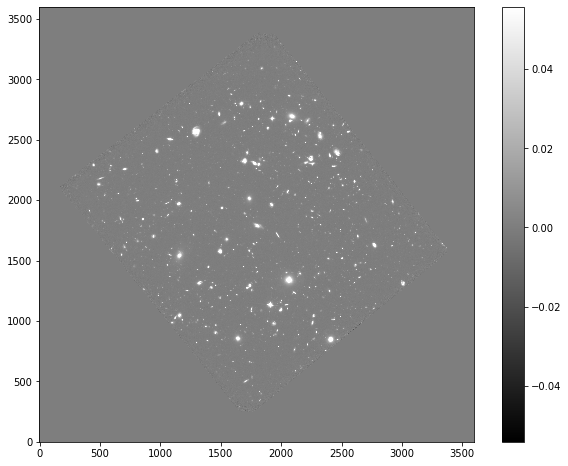

In [9]:
data = image[0].data
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.imsave('data.png', data, cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

In [10]:
data = data.byteswap(inplace=True).newbyteorder()

In [11]:
bkg = sep.Background(data)

In [12]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [13]:
bkg_image = bkg.back()

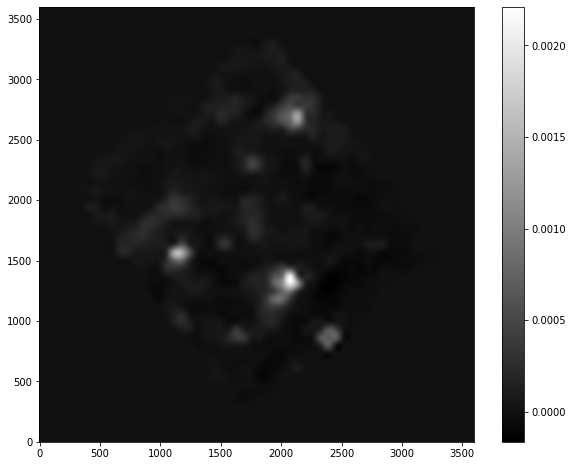

In [14]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.imsave('bkg_image.png', bkg_image, cmap='gray', origin='lower')

In [15]:
bkg_rms = bkg.rms()

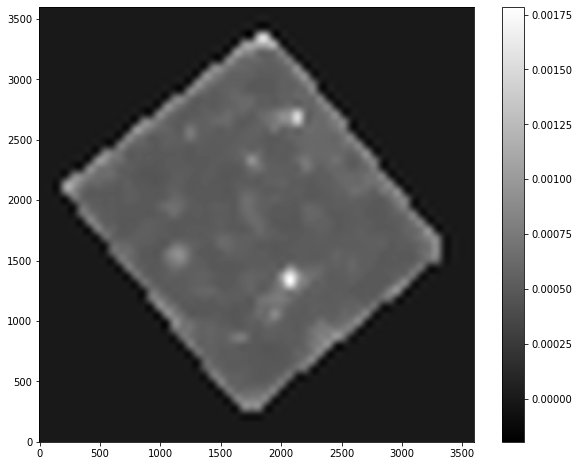

In [16]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.imsave('bkg_rms.png',bkg_rms, cmap='gray', origin='lower')

In [17]:
data_sub = data - bkg

In [18]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [19]:
len(objects)

8640

In [20]:
from matplotlib.patches import Ellipse

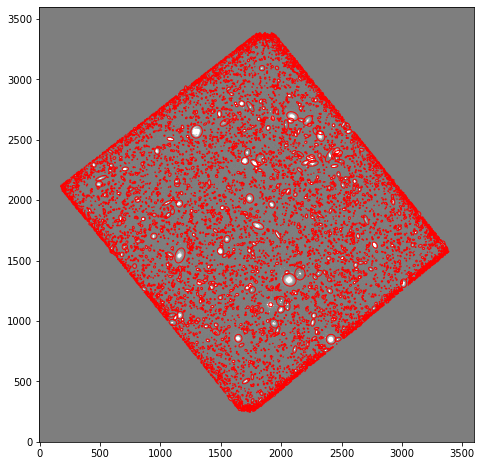

In [21]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.imsave('data_sub.png',data_sub,cmap='gray',vmin=m-s, vmax=m+s, origin='lower')

In [22]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [23]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [85]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Min: -1.061365427845663
Max: 807.2972835731507
Mean: 0.36185728037707154
Std: 9.243528029706706
[ 0.03128197  0.03101789 -0.02438809 ...  0.08851303  0.01802793
  0.01398957]


(array([8.621e+03, 7.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ -1.06136543,  15.10580755,  31.27298053,  47.44015351,
         63.60732649,  79.77449947,  95.94167245, 112.10884543,
        128.27601841, 144.44319139, 160.61036437, 176.77753735,
        192.94471033, 209.11188331, 225.27905629, 241.44622927,
        257.61340225, 273.78057523, 289.94774821, 306.11492119,
        322.28209417, 338.44926715, 354.61644013, 370.78

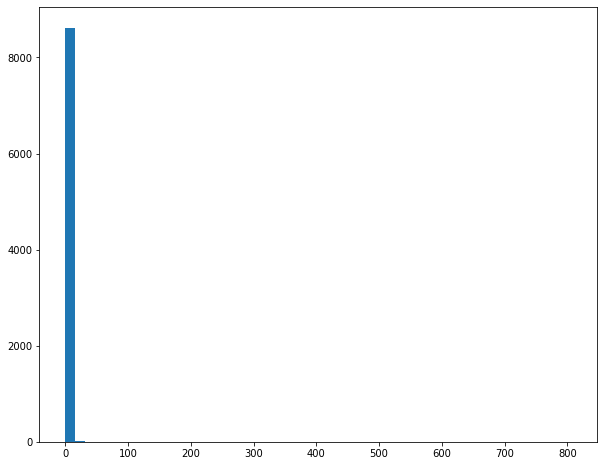

In [92]:
print('Min:',np.min(flux))
print('Max:',np.max(flux))
print('Mean:',np.mean(flux))
print('Std:',np.std(flux))
print(flux)
plt.hist(flux, bins=50)


In [74]:
from astropy.visualization import make_lupton_rgb

In [75]:
image_r_1 = fits.open('C:/Users/13720/Desktop/Final project/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
image_g_1 = fits.open('C:/Users/13720/Desktop/Final project/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
image_b_1 = fits.open('C:/Users/13720/Desktop/Final project/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')

In [76]:
r_1 = image_r_1[0].data
g_1 = image_g_1[0].data
b_1 = image_b_1[0].data

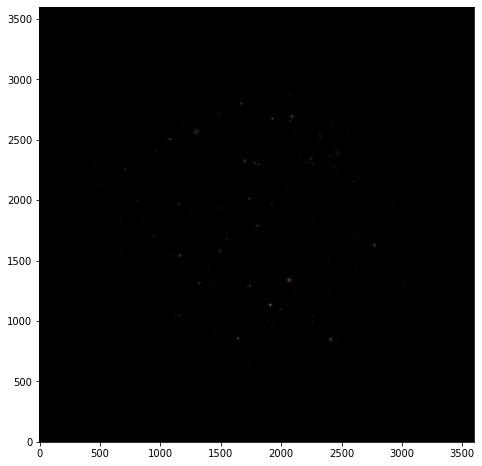

In [77]:
rgb_1 = make_lupton_rgb(b_1 , r_1, g_1 ,stretch = 1.5, Q = 10)
plt.imshow(rgb_1,origin='lower')
plt.savefig("3-color false image.png")